# DM 2023 assignment 1 -- Customers Classification
- Jakub Niedziela
- s0224740

## Notes
While discussing the problem with your contacts at marketing, you learn the following
observations:
- People with higher incomes (more than 50K) are more likely to react positively to
the special promotion; 10% of them is likely to accept the offer, whereas only 5% of
the lower income people reacts positively.
- The average return of a new customer highly depends on his or her income. Higher
income people tend to generate more revenue; on average the profit for a high-
income client is 980 Euro. Low income clients on the other hand, cost money on
average; a low income customer will cost you on average 310 Euro.
- The cost of producing and mailing the promotional package is 10 Euro.

### Revenue maximization

We can see in section below, that because customers with income over 50K generate 980 Euro profit, and customers with income less than 50K generate 310 Euro loss, the best possible scenario is sending the promotional package only to people with incomes over 50K Euro. Thanks to this we know, that the goal of prediction is to predict the >50K class with high cerainty.

In [1]:
def revenue_calculator(n_high, n_low):
    return n_high * 980 * 0.1 - n_low * 310 * 0.05 - (n_low * 0.05 + n_high * 0.1) * 10

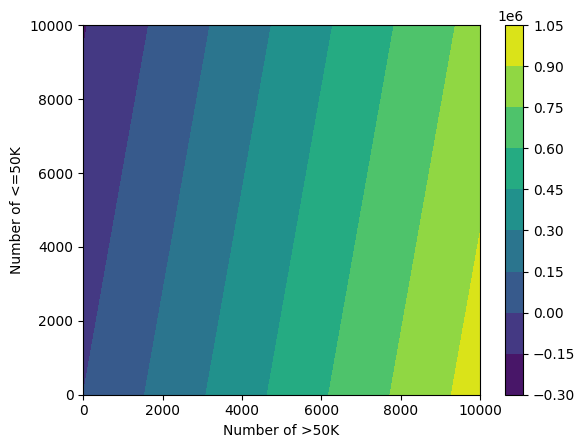

In [2]:
import matplotlib.pyplot as plt
import numpy as np

high = np.arange(0, 10001)
low = np.arange(0, 10001)

B, D = np.meshgrid(high, low)
revenue = revenue_calculator(B, D)

plt.contourf(B, D, revenue)
plt.colorbar()
plt.xlabel('Number of >50K')
plt.ylabel('Number of <=50K')
plt.show()

## Goal

Solve this problem (provide the liust of people to send the promotion to) and give an
estimate of the profit you expect when sending the promotion to the people you selected.
The goal is to maximize revenue.

## Data
Recently the company bought demographic information that was obtained the data
through a survey. Unfortunately, the data does not contain the income of people.
Only for those people that are already clients of our company, the income is available.
As a result you get the following two datasets: <b>potential-customers.xlsx</b> contains
the demographic information of all people that are not yet clients, while <b>existing-
customers.xlsx</b> contains the demographic information and whether or not the
income of the person exceeds 50K for all clients of the company.

## Codes

### 1. Load Data

In [9]:
import pandas as pd

In [10]:
raw_cust = pd.read_excel('data/existing-customers.xlsx')

/Users/jniedziela/.pyenv/versions/3.10.0/envs/DM/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### 2. Discover Data

In [191]:
from ydata_profiling import ProfileReport  # pandas profiling

In [192]:
profile = ProfileReport(raw_cust, title="Profiling Report")

In [193]:
profile.to_file("your_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Notes based on report
- high correlation between education and education-num
- high correlation between sex and relationship
- high imbalance in workclass -> 70% in private sector
- high imbalance in race -> 85% white ppl
- high imbalance in native country -> 90% from US
- 5.6% missing values in workclass
- 5.7% missing values in occupation
- 1.8% missing values in native country
- capital gain / loss cols have large amounts of 0's (both above 90%)

#### Possile actions
1. Remove education col --> correlation = 1.0 with education-num
2. What to do with sex vs relationship corr (0.65)
3. Remove race
4. Remove Native Country 
5. How to replace missing vals in workclass --> maybe based on occupation, or just remove workclass and get occupation

#### 3.2 Missing values
Imputation of missing values is critical for good model performance. There are many possibilities to do this step - missing values can be replaced with column mean, mode or using even more advanced methods. Other possiblity is also to remove all the rows with missing data. Here I will try different approaches  to get the best possible score in the end.
##### 3.2.1. drop all
 - We can see that missing values account for about 7% of training data. On one hand removing all of them might lead to less model training and less accurate results, however this way the data will not be poisoned by possibly false information, therefore making model more robust.